# Import libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [34]:
path = r'./in/Case_Mailing_2022.csv'
df = pd.read_csv(path, sep=';', decimal=',')

In [35]:
df.shape

(21740, 33)

# Column description

*   ZIP_CODE -> *Postleitzahl*
*   DAYS_SINCE_PURCHASE -> *Tage seit Kaufdatum*
*   PURCHASE_VISITS -> *Anzahl der Kaufbesuche*
*   TOTAL_NET_SALES -> *Gesamtnettoumsatz*
*   CC_CARD -> *Kreditkartenbenutzung*
*   AVE_AMOUNT_SPENT -> *Durchschnittlicher Betrag, der pro Besuch ausgegeben wird*
*   AMSPEND -> *im Franchise AM ausgegebener Betrag*
*   PSSPEND -> *im Franchise PS ausgegebener Betrag*
*   CCSPEND -> *im Franchise CC ausgegebener Betrag*
*   AXSPEND -> *im Franchise AX ausgegebener Betrag*
*   OMONSPEND -> *im letzten Monat ausgegebener Betrag*
*   TMONSPEND -> *in den letzten drei Monaten ausgegebener Betrag*
*   SMONSPEND -> *in den letzten sechs Monaten ausgegebener Betrag*
*   PREVPD -> *im gleichen Zeitraum des letzten Jahres ausgegebener Betrag*
*   GMP -> *Prozentsatz der Bruttomarge*
*   PROMOS -> *Anzahl der gespeicherten Marketingaktionen*
*   DAYS -> *Anzahl der Tage, in denen der Kunde registriert war*
*   FREDAYS -> *Anzahl der Tage zwischen den Käufen*
*   MARKDOWN -> *Abschlagsprozentsatz auf Kundenkäufe*
*   CLASSES -> *Anzahl der gekauften unterschiedlichen Produktklassen*
*   COUPONS -> *Anzahl der vom Kunden verwendeten Coupons*
*   STYLES -> *Gesamtzahl der vom Kunden gekauften Einzalartikel*
*   STORES -> *Anzahl der Geschäfte, in denen der Kunde eingekauft hat*
*   VALPHON -> *gültige Telefonnummer hinterlegt*
*   WEB -> *WEB-Shopper*
*   MAILED -> *Anzahl der im vergangenen Jahr verschickten Werbeaktionen*
*   RESPONDED -> *Anzahl der Werbeaktion, auf die im vergangenen Jahr reagiert wurde*
*   RESPONSERATE -> *Aktionsrücklauf für das vergangene Jahr*
*   HI -> *Produkteinheitlichkeit (niedriger Wert = unterschiedlicher Ausgabemuster)*
*   LTFREDAY -> *Lebenslage durchschnittliche Zeit zwischen Besuchen*
*   CLUSTYPE -> *Clusterzugehörigkeit*
*   PERCRET -> *Prozentsatz an Rückläufern*
*   RESP -> *Reaktion auf Promo*

# EDA

In [36]:
print('Shape: ')
print(df.shape)
print('----------')
print('Info: ')
print(df.info())
print('----------')

Shape: 
(21740, 33)
----------
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21740 entries, 0 to 21739
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ZIP_CODE             21740 non-null  object 
 1   DAYS_SINCE_PURCHASE  21740 non-null  int64  
 2   PURCHASE_VISITS      21740 non-null  int64  
 3   TOTAL_NET_SALES      21740 non-null  float64
 4   CC_CARD              21740 non-null  int64  
 5   AVE_AMOUNT_SPENT     21740 non-null  float64
 6   AMSPEND              21740 non-null  float64
 7   PSSPEND              21740 non-null  float64
 8   CCSPEND              21740 non-null  float64
 9   AXSPEND              21740 non-null  float64
 10  TMONSPEND            21740 non-null  float64
 11  OMONSPEND            21740 non-null  float64
 12  SMONSPEND            21740 non-null  float64
 13  PREVPD               21740 non-null  float64
 14  GMP                  21740 non-null  float64
 15

In [37]:
print('Head: ')
df.head(5)

Head: 


,ZIP_CODE,DAYS_SINCE_PURCHASE,PURCHASE_VISITS,TOTAL_NET_SALES,CC_CARD,AVE_AMOUNT_SPENT,AMSPEND,PSSPEND,CCSPEND,AXSPEND,...,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,ZIP_1001,208,2,368.46,0,184.23,0.0,0.0,368.46,0.0,...,0,0,5,0,0.0000,0.3181,111.00,Cluster_10,0.000000e+00,0
1,ZIP_1028,6,4,258.00,1,64.50,0.0,0.0,258.00,0.0,...,1,0,4,2,0.5000,0.3272,43.50,Cluster_10,3.000000e-08,1
2,ZIP_1056,327,2,77.00,0,38.50,0.0,0.0,77.00,0.0,...,0,0,4,0,0.0000,1.0000,68.60,Cluster_16,0.000000e+00,0
3,ZIP_1118,66,8,846.06,1,105.75,0.0,0.0,846.06,0.0,...,1,0,9,6,0.6667,0.2327,26.96,Cluster_10,0.000000e+00,0
4,ZIP_1107,49,1,87.44,0,87.44,0.0,0.0,87.44,0.0,...,1,0,0,0,0.0000,0.2852,24.50,Cluster_20,0.000000e+00,0


In [38]:
df[["ZIP_CODE","CLUSTYPE"]].head(5)

,ZIP_CODE,CLUSTYPE
0,ZIP_1001,Cluster_10
1,ZIP_1028,Cluster_10
2,ZIP_1056,Cluster_16
3,ZIP_1118,Cluster_10
4,ZIP_1107,Cluster_20


# Data preparation

In [39]:
# Create new 'prepared' df
df_clean = df.copy()

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21740 entries, 0 to 21739
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ZIP_CODE             21740 non-null  object 
 1   DAYS_SINCE_PURCHASE  21740 non-null  int64  
 2   PURCHASE_VISITS      21740 non-null  int64  
 3   TOTAL_NET_SALES      21740 non-null  float64
 4   CC_CARD              21740 non-null  int64  
 5   AVE_AMOUNT_SPENT     21740 non-null  float64
 6   AMSPEND              21740 non-null  float64
 7   PSSPEND              21740 non-null  float64
 8   CCSPEND              21740 non-null  float64
 9   AXSPEND              21740 non-null  float64
 10  TMONSPEND            21740 non-null  float64
 11  OMONSPEND            21740 non-null  float64
 12  SMONSPEND            21740 non-null  float64
 13  PREVPD               21740 non-null  float64
 14  GMP                  21740 non-null  float64
 15  PROMOS               21740 non-null 

In [41]:
# Remove prefix from ZIP_CODE column
df_clean["ZIP_CODE"] = df_clean["ZIP_CODE"].apply(lambda x:x.split("_")[1])
df_clean["ZIP_CODE"] = df_clean["ZIP_CODE"].str[:2]

In [42]:
df_clean

,ZIP_CODE,DAYS_SINCE_PURCHASE,PURCHASE_VISITS,TOTAL_NET_SALES,CC_CARD,AVE_AMOUNT_SPENT,AMSPEND,PSSPEND,CCSPEND,AXSPEND,...,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,10,208,2,368.46,0,184.23,0.0,0.00,368.46,0.000000,...,0,0,5,0,0.0000,0.3181,111.00,Cluster_10,0.000000e+00,0
1,10,6,4,258.00,1,64.50,0.0,0.00,258.00,0.000000,...,1,0,4,2,0.5000,0.3272,43.50,Cluster_10,3.000000e-08,1
2,10,327,2,77.00,0,38.50,0.0,0.00,77.00,0.000000,...,0,0,4,0,0.0000,1.0000,68.60,Cluster_16,0.000000e+00,0
3,11,66,8,846.06,1,105.75,0.0,0.00,846.06,0.000000,...,1,0,9,6,0.6667,0.2327,26.96,Cluster_10,0.000000e+00,0
4,11,49,1,87.44,0,87.44,0.0,0.00,87.44,0.000000,...,1,0,0,0,0.0000,0.2852,24.50,Cluster_20,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21735,63,322,2,39.00,0,19.50,0.0,0.00,39.00,0.000000,...,1,0,1,0,0.0000,0.1583,107.66,Cluster_1,1.510000e+00,0
21736,72,53,6,280.59,0,46.76,0.0,0.00,213.22,0.000067,...,0,0,5,2,0.4000,0.0867,18.45,Cluster_12,6.900000e-07,0
21737,77,24,9,1274.96,0,141.66,0.0,785.31,489.65,0.000000,...,0,0,7,2,0.2857,0.1971,12.62,Cluster_15,8.000000e-08,1
21738,78,37,3,265.94,0,88.64,0.0,13.99,251.95,0.000000,...,1,0,7,0,0.0000,0.1163,32.12,Cluster_38,3.700000e-07,0


**Anzahl Cluster Types**

In [43]:
len(set(df_clean["CLUSTYPE"]))

51

**Wieviele Personen haben eine gültige Telefonnummer hinterlegt?**

In [44]:
df_clean[df_clean["VALPHON"]==1]["VALPHON"].size

18687

**Wieviele Personen haben keine gültige Telefonnummer hinterlegt?**

In [45]:
df_clean[df_clean["VALPHON"]==0]["VALPHON"].size

3053

**Wieviele Personen haben in der Vergangenheit auf Promoaktionen geantwortet?**

In [46]:
df_clean_responded = df_clean[df_clean["RESPONDED"]!=0]

In [47]:
print(df_clean_responded["PERCRET"].mean()*100, "%")

6.565714028803828 %


**Wie hoch ist der Prozentsatz an Rückläufern im Mittel?**

In [48]:
print(df_clean["PERCRET"].mean()*100, "%")

5.22222494746706 %


**Wieviele Einzelartikel werden im Mittel gekauft?**

In [49]:
df_clean["STYLES"].mean()

17.20515179392824

**Über welche Features wird am Meisten gekauft?**

In [50]:
print("AM: ",df_clean[df_clean["AMSPEND"]!=0].shape[0])
print("PS: ",df_clean[df_clean["PSSPEND"]!=0].shape[0])
print("CC: ",df_clean[df_clean["CCSPEND"]!=0].shape[0])
print("AX: ",df_clean[df_clean["AXSPEND"]!=0].shape[0])

AM:  1075
PS:  9636
CC:  21740
AX:  2884


In [51]:
am = df_clean["AMSPEND"].sum()
ps = df_clean["PSSPEND"].sum()
cc = df_clean["CCSPEND"].sum()
ax = df_clean["AXSPEND"].sum()
liste = [am,ps,cc,ax]

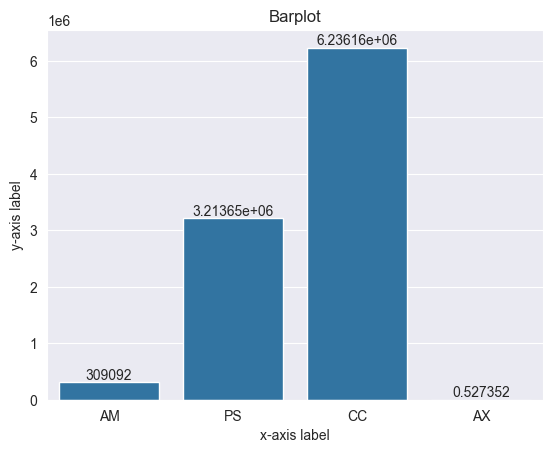

In [52]:
ax = sns.barplot(x=["AM","PS","CC","AX"], y=liste)
ax.set(xlabel='x-axis label', ylabel='y-axis label',title="Barplot")
ax.bar_label(ax.containers[0])
plt.show()

In [53]:
df_clean.columns

Index(['ZIP_CODE', 'DAYS_SINCE_PURCHASE', 'PURCHASE_VISITS', 'TOTAL_NET_SALES',
       'CC_CARD', 'AVE_AMOUNT_SPENT', 'AMSPEND', 'PSSPEND', 'CCSPEND',
       'AXSPEND', 'TMONSPEND', 'OMONSPEND', 'SMONSPEND', 'PREVPD', 'GMP',
       'PROMOS', 'DAYS', 'FREDAYS', 'MARKDOWN', 'CLASSES', 'COUPONS', 'STYLES',
       'STORES', 'VALPHON', 'WEB', 'MAILED', 'RESPONDED', 'RESPONSERATE', 'HI',
       'LTFREDAY', 'CLUSTYPE', 'PERCRET', 'RESP'],
      dtype='object')

<h1> Korrelationen <h1>

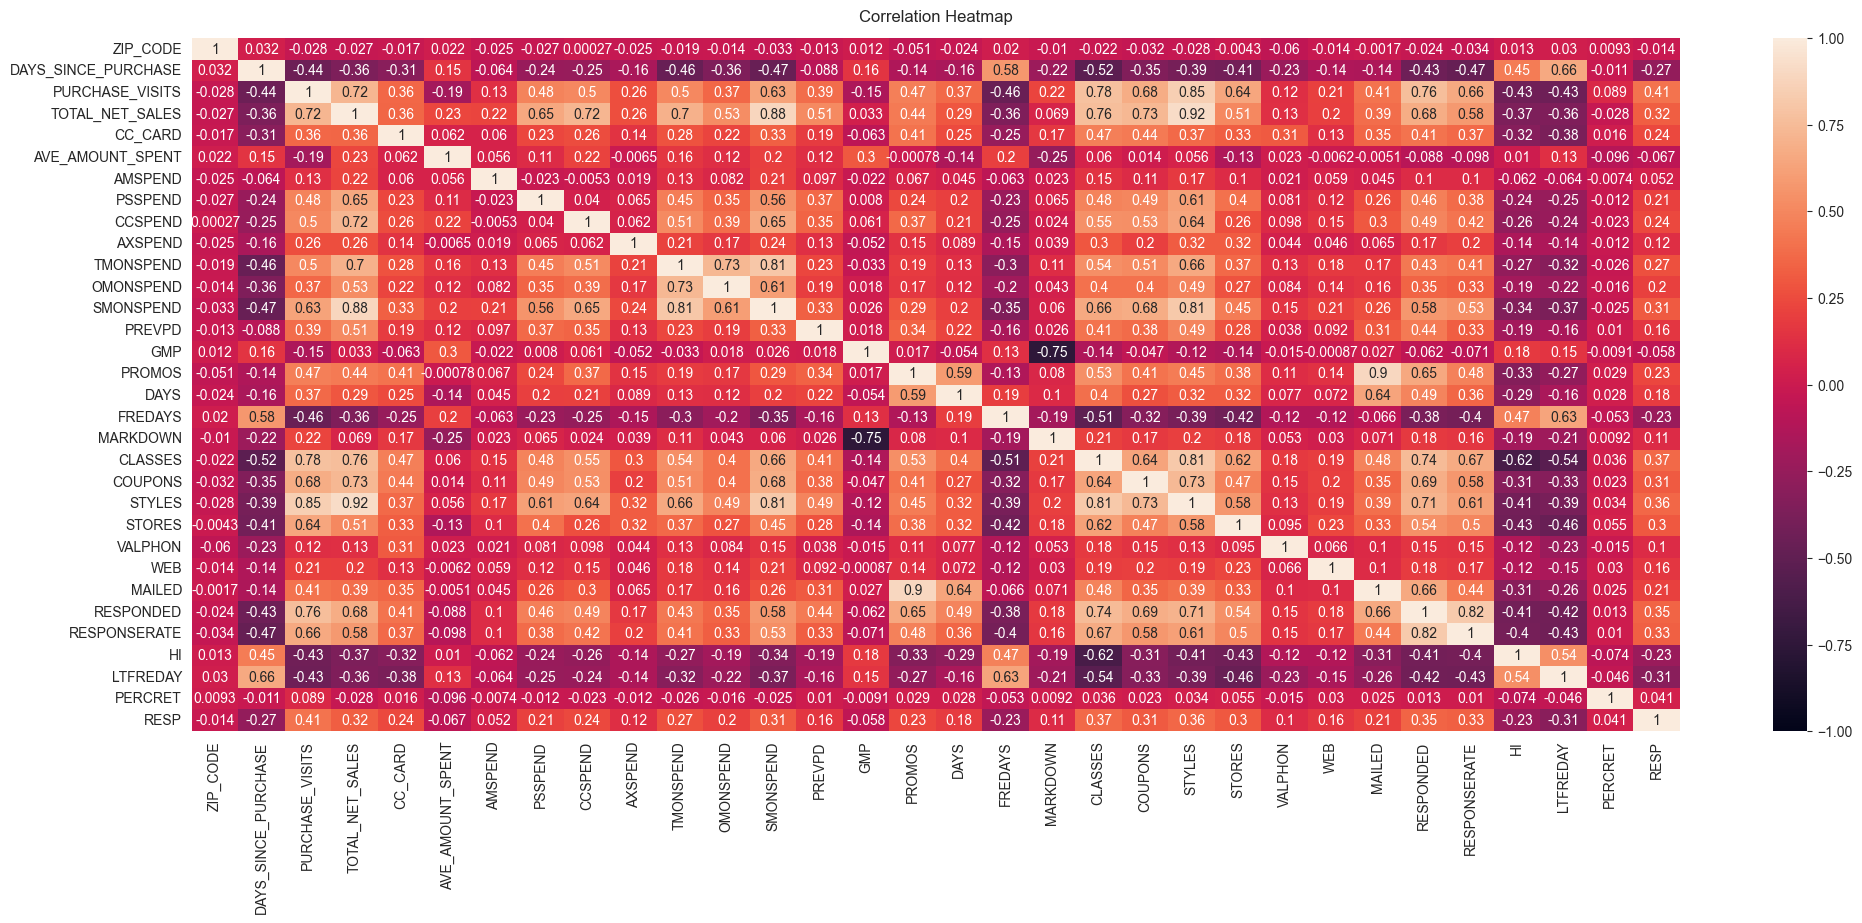

In [54]:
plt.figure(figsize=(24,9))

df_without_clustype = df_clean.loc[:,df_clean.columns != "CLUSTYPE"]
heatmap = sns.heatmap(df_without_clustype.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

plt.show()

In [55]:
df_corr = df_without_clustype.corr()
high_resp_corr = df_corr[df_corr["RESP"]>0.3]
high_resp_corr["RESP"]

PURCHASE_VISITS    0.407606
TOTAL_NET_SALES    0.322801
SMONSPEND          0.310150
CLASSES            0.372776
COUPONS            0.307182
STYLES             0.364063
STORES             0.304242
RESPONDED          0.350589
RESPONSERATE       0.331459
RESP               1.000000
Name: RESP, dtype: float64

In [56]:
low_resp_corr = df_corr[df_corr["RESP"]<-0.3]
low_resp_corr["RESP"]

LTFREDAY   -0.307191
Name: RESP, dtype: float64

In [57]:
print("Anzahl RESP Yes: ",sum(df_clean["RESP"]))
print("Anteil RESP Yes: ",(sum(df_clean["RESP"])/df_clean.shape[0]*100),"%")

Anzahl RESP Yes:  3611
Anteil RESP Yes:  16.6099356025759 %


In [58]:
print("Anzahl RESP No: ",((len(df_clean["RESP"])) - sum(df_clean["RESP"])))
print("Anteil RESP No: ",(((len(df_clean["RESP"])) - sum(df_clean["RESP"]))/df_clean.shape[0]*100),"%")

Anzahl RESP No:  18129
Anteil RESP No:  83.3900643974241 %


Text(0.5, 1.0, 'Anzahl der Reaktionen auf die Direct-Mail-Marketing-Maßnahme')

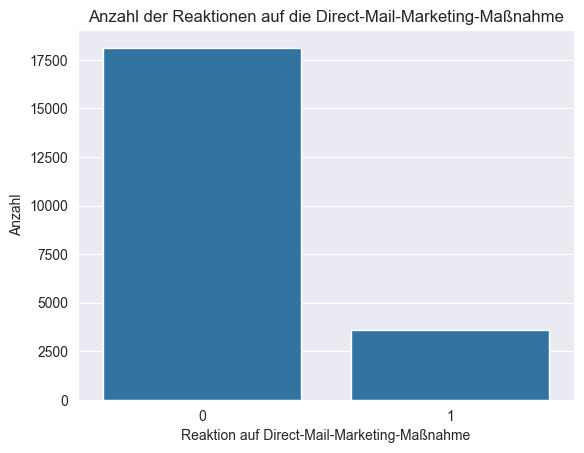

In [59]:
cp_resp = sns.countplot(x="RESP", data=df_clean)
cp_resp.set_xlabel("Reaktion auf Direct-Mail-Marketing-Maßnahme")
cp_resp.set_ylabel("Anzahl")
cp_resp.set_title("Anzahl der Reaktionen auf die Direct-Mail-Marketing-Maßnahme")

<h1>Get Dummies für object Spalten<h1>

In [60]:
# Convert the "type" variable to dummy variables
df_clean = pd.get_dummies(df_clean, columns=['CLUSTYPE'])
df_clean = pd.get_dummies(df_clean, columns=['ZIP_CODE'])

In [61]:
df_clean

,DAYS_SINCE_PURCHASE,PURCHASE_VISITS,TOTAL_NET_SALES,CC_CARD,AVE_AMOUNT_SPENT,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,...,ZIP_CODE_90,ZIP_CODE_91,ZIP_CODE_92,ZIP_CODE_93,ZIP_CODE_94,ZIP_CODE_95,ZIP_CODE_96,ZIP_CODE_97,ZIP_CODE_98,ZIP_CODE_99
0,208,2,368.46,0,184.23,0.0,0.00,368.46,0.000000,0.00,...,False,False,False,False,False,False,False,False,False,False
1,6,4,258.00,1,64.50,0.0,0.00,258.00,0.000000,138.00,...,False,False,False,False,False,False,False,False,False,False
2,327,2,77.00,0,38.50,0.0,0.00,77.00,0.000000,0.00,...,False,False,False,False,False,False,False,False,False,False
3,66,8,846.06,1,105.75,0.0,0.00,846.06,0.000000,104.94,...,False,False,False,False,False,False,False,False,False,False
4,49,1,87.44,0,87.44,0.0,0.00,87.44,0.000000,87.44,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21735,322,2,39.00,0,19.50,0.0,0.00,39.00,0.000000,0.00,...,False,False,False,False,False,False,False,False,False,False
21736,53,6,280.59,0,46.76,0.0,0.00,213.22,0.000067,131.36,...,False,False,False,False,False,False,False,False,False,False
21737,24,9,1274.96,0,141.66,0.0,785.31,489.65,0.000000,356.00,...,False,False,False,False,False,False,False,False,False,False
21738,37,3,265.94,0,88.64,0.0,13.99,251.95,0.000000,0.00,...,False,False,False,False,False,False,False,False,False,False


In [62]:
df_clean[["ZIP_CODE_11","ZIP_CODE_12","CLUSTYPE_Cluster_1","CLUSTYPE_Cluster_2","CLUSTYPE_Cluster_3"]].head(5)

,ZIP_CODE_11,ZIP_CODE_12,CLUSTYPE_Cluster_1,CLUSTYPE_Cluster_2,CLUSTYPE_Cluster_3
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False


In [63]:
df_clean.shape

(21740, 173)

# Export df_clean

In [64]:
path = r'./out/df_clean.csv'
df_clean.to_csv(path, sep=';', decimal=',', index=False)